In [1]:
def f(x1,x2):
    return(x1*x1*x1+9*x1*x1+6*x1*x2+87*x1+8*x2*x2*x2+240*x2*x2+2418*x2+8208)
#def f(x):
#    return(x[0]*x[0]*x[0]+9*x[0]*x[0]+6*x[0]*x[1]+87*x[0]+8*x[1]*x[1]*x[1]+240*x[1]*x[1]+2418*x[1]+8208)
def df1_x1(x1,x2):
    return(3*x1*x1+18*x1+6*x2+87)
def df1_x2(x1,x2):
    return(6*x1+24*x2*x2+480*x2+2418)
def df2_x1_x1(x1,x2):
    return(6*x1+18)
def df2_x1_x2(x1,x2):
    return(6)
def df2_x2_x2(x1,x2):
    return(48*x2+480)

In [2]:
def inv(x1,x2):
    temp=df2_x2_x2(x1,x2)*df2_x1_x1(x1,x2)-df2_x1_x2(x1,x2)*df2_x1_x2(x1,x2)
    F=[[0,0],[0,0]]
    F[0][0]=df2_x2_x2(x1,x2)/temp
    F[0][1]=-df2_x1_x2(x1,x2)/temp
    F[1][0]=-df2_x1_x2(x1,x2)/temp
    F[1][1]=df2_x1_x1(x1,x2)/temp
    return(F)

In [3]:
def p(x1,x2):
    f=inv(x1,x2)
    P=[0,0]
    P[0]=f[0][0]*df1_x1(x1,x2)+f[0][1]*df1_x2(x1,x2)
    P[1]=f[1][0]*df1_x1(x1,x2)+f[1][1]*df1_x2(x1,x2)
    return(P)

In [20]:
M=[]

In [21]:
def Newton_Raphson(x1,x2,l,e,k):
    global M
    M.append([x1,x2])
    x1_new=x1-l*p(x1,x2)[0]
    x2_new=x2-l*p(x1,x2)[1]
    F=f(x1_new,x2_new)
    print(x1,' ; ',x2,' - ',f(x1,x2))
    print(x1_new,' ; ',x2_new,' - ',F)
    if (abs(F-f(x1,x2))<=e):
        M.append([x1_new,x2_new])
        return(x1_new,x2_new,F)
    else:
        l=l*k
        return(Newton_Raphson(x1_new,x2_new,l,e,k))

In [22]:
O=Newton_Raphson(5,11,1,0.0001,1)
#print(O)
#print(O[0],' ; ',O[1],' - ',O[2])
#print(f(O[0],O[1]))

5  ;  11  -  75609
-0.3104988830975435  ;  0.4839910647803407  -  9408.339423833942
-0.3104988830975435  ;  0.4839910647803407  -  9408.339423833942
-3.6069990477617075  ;  -4.750767254176378  -  1138.7762123726461
-3.6069990477617075  ;  -4.750767254176378  -  1138.7762123726461
0.8686522306915903  ;  -7.467507857857189  -  247.62149622323705
0.8686522306915903  ;  -7.467507857857189  -  247.62149622323705
-1.3722150220143798  ;  -8.814098945152823  -  30.237910145930073
-1.3722150220143798  ;  -8.814098945152823  -  30.237910145930073
-2.5192452011332267  ;  -9.457723472412008  -  3.9510381067793787
-2.5192452011332267  ;  -9.457723472412008  -  3.9510381067793787
-3.6216931981311626  ;  -9.585555423258896  -  -0.2167358948427136
-3.6216931981311626  ;  -9.585555423258896  -  -0.2167358948427136
-2.9848683562938394  ;  -9.79734154373006  -  1.0849889897654066
-2.9848683562938394  ;  -9.79734154373006  -  1.0849889897654066
-2.8317768842741335  ;  -10.00243100892968  -  1.002306722446

In [19]:
print(f(-3,-10))
print(f(-3,-10.0001))
print(f(-3,-10.0000000001))
print(f(-3,-9.9999999))
print(f(-3,-9.9))

1
0.999999999992724
1.000000000003638
0.999999999998181
1.0079999999998108


In [7]:
def Svenn(x1,x2,h,ind=0):
    if (ind==0):
        direction=(f(x1,x2)-f(x1+h,x2))/abs(f(x1,x2)-f(x1+h,x2))
        return(Svenn_1(x1,x2,h,direction))
    if (ind==1):
        direction=(f(x1,x2)-f(x1,x2+h))/abs(f(x1,x2)-f(x1,x2+h))
        return(Svenn_2(x1,x2,h,direction))

In [8]:
def Svenn_1(x1,x2,h,d):
    x1_new=x1+h*d
    if (f(x1_new,x2)<=f(x1,x2)):
        h*=2
        return(Svenn_1(x1_new,x2,h,d))
    else:
        if(x1_new>x1):
            return(x1,x1_new)
        else:
            return(x1_new,x1)

In [9]:
def Svenn_2(x1,x2,h,d):
    x2_new=x2+h*d
    if (f(x1,x2_new)<=f(x1,x2)):
        h*=2
        return(Svenn_2(x1,x2_new,h,d))
    else:
        if(x2_new>x2):
            return(x2,x2_new)
        else:
            return(x2_new,x2)

In [10]:
print(Svenn(5,11,0.1,0))

(-5.363123171977039e+153, -2.6815615859885196e+153)


In [11]:
print(f(Svenn(5,11,0.1,0)[1],11))

-inf


In [1]:
def f(x1,x2):
    return((x1-2)*(x1-2))

In [2]:
def kvadr_interp(x1,x2,a,b,d,e):
    if (d==0):
        x1=(b-a)/2
        print(x1)
        return(kvadr_interp_x1(x1,x2,a,b,e))
    else:
        x2=(a+b)/2
        return(kvadr_interp_x2(x1,x2,a,b,e))

In [3]:
def kvadr_interp_x1(x1,x2,a,b,e):
    print(x1)
    b_new=b-x1
    a_new=x1-a
    f1=(f(a,x2)-f(x1,x2))*b_new
    f2=(f(b,x2)-f(x1,x2))*a_new
    x1_new=x1+(f1*b_new-f2*a_new)/(2*(f1+f2))
    y1=f(x1,x2)
    y1_new=f(x1_new,x2)
    if (abs(x1-x1_new)<e):
        return(x1_new)
    elif (x1_new<x1):
        if (y1_new<y1):
            b=x1
            x1=x1_new
        else:
            a=x1_new
    else:
        if (y1_new>y1):
            b=x1_new
        else:
            a=x1
            x1=x1_new
    return(kvadr_interp_x1(x1,x2,a,b,e))

In [4]:
def kvadr_interp_x2(x1,x2,a,b,e):
    b_new=b-x2
    a_new=x2-a
    f1=(f(x1,a)-f(x1,x2))*b_new
    f2=(f(x1,b)-f(x1,x2))*a_new
    x2_new=x2+(f1*b_new-f2*a_new)/(2*(f1+f2))
    y1=f(x1,x2)
    y1_new=f(x1,x2_new)
    if (abs(x2-x2_new)<e):
        return(x2_new)
    elif (x2_new<x2):
        if (y1_new<y1):
            b=x2
            x2=x2_new
        else:
            a=x2_new
    else:
        if (y1_new>y1):
            b=x2_new
        else:
            a=x2
            x2=x2_new
    return(kvadr_interp_x2(x1,x2,a,b,e))

In [ ]:
print(kvadr_interp(5,11,-10,5,0,0.01))

In [23]:
print(M)

[[5, 11], [-0.3104988830975435, 0.4839910647803407], [-3.6069990477617075, -4.750767254176378], [0.8686522306915903, -7.467507857857189], [-1.3722150220143798, -8.814098945152823], [-2.5192452011332267, -9.457723472412008], [-3.6216931981311626, -9.585555423258896], [-2.9848683562938394, -9.79734154373006], [-2.8317768842741335, -10.00243100892968], [-2.999702154569123, -9.985900596154126], [-2.999204805532911, -10.000000192489088]]


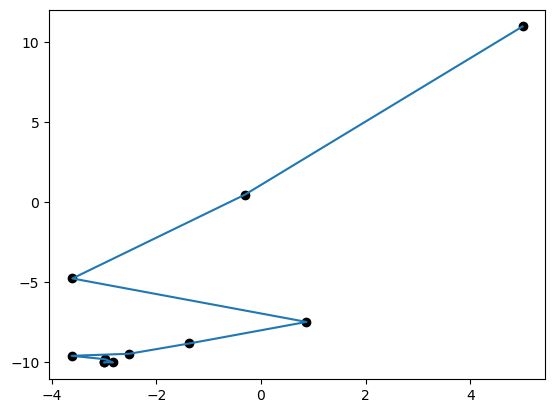

In [27]:
import matplotlib.pyplot as plt
x=[]
y=[]
for i in range(0,len(M)):
    x.append(M[i][0])
    y.append(M[i][1])
for i in range(0,len(x)):
    plt.scatter(x[i], y[i], color='black')
    
plt.plot(x,y)
plt.show()

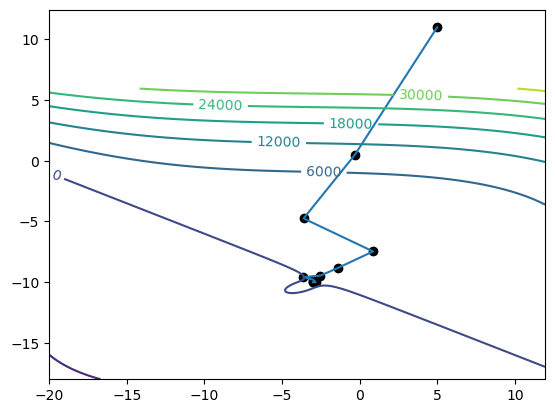

In [33]:
import matplotlib.pyplot as plt

import numpy as np


def make_data():
    x = np.arange(-20, 12, 0.05)
    y = np.arange(-18, 6, 0.05)
    xgrid, ygrid = np.meshgrid(x, y)
    z = xgrid*xgrid*xgrid+9*xgrid*xgrid+6*xgrid*ygrid+87*xgrid+8*ygrid*ygrid*ygrid+240*ygrid*ygrid+2418*ygrid+8208
    return xgrid, ygrid, z
x=[]
y=[]
for i in range(0,len(M)):
    x.append(M[i][0])
    y.append(M[i][1])
for i in range(0,len(x)):
    plt.scatter(x[i], y[i], color='black')
plt.plot(x,y)    

if __name__ == '__main__':
    x, y, z = make_data()

    cs = plt.contour(x, y, z)
    plt.clabel(cs)
    plt.show()

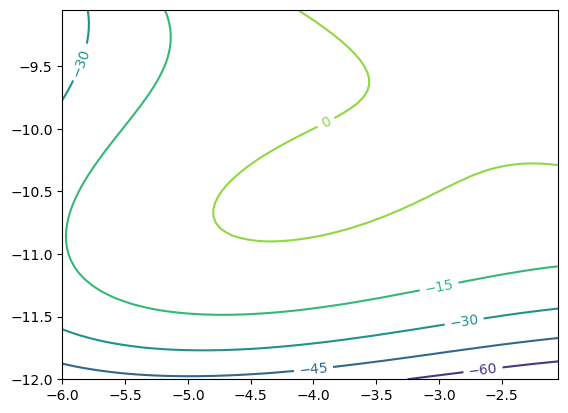

In [35]:
import matplotlib.pyplot as plt

import numpy as np


def make_data():
    x = np.arange(-6, -2, 0.05)
    y = np.arange(-12, -9, 0.05)
    xgrid, ygrid = np.meshgrid(x, y)
    z = xgrid*xgrid*xgrid+9*xgrid*xgrid+6*xgrid*ygrid+87*xgrid+8*ygrid*ygrid*ygrid+240*ygrid*ygrid+2418*ygrid+8208
    return xgrid, ygrid, z

if __name__ == '__main__':
    x, y, z = make_data()

    cs = plt.contour(x, y, z)
    plt.clabel(cs)
    plt.show()